In [1]:
println("Sonu Amrith")

Intitializing Scala interpreter ...

Spark Web UI available at http://SonuAmrith:4040
SparkContext available as 'sc' (version = 3.0.3, master = local[*], app id = local-1652414767123)
SparkSession available as 'spark'


Sonu Amrith


In [12]:
sc.defaultParallelism // by default there are 8 number of partitions

res5: Int = 8


In [14]:
//How to get the default block size of each partition?

spark.conf.get("spark.sql.files.maxPartitionBytes")

// so by default each partition block size is 134 MB

res7: String = 134217728b


In [2]:
/*
Installing Scala on Jupyter Notebook
1.Install the Java
2.Install the Scala
3.Install the Spark
4.Install the Anaconda and set the path in Path Environment variable
5.install the packages using this command in windows powershell 
  i) (pip install spylon-kernel)
  ii) python -m spylon_kernel install
*/

In [1]:
import org.apache.spark.sql.types._
val schem=StructType(Array(StructField("Serial Number",StringType,true),StructField("Company Name",StringType,true),StructField("Employee Markme",StringType,true),StructField("Description",StringType,true),StructField("Leave",StringType,true)))

Intitializing Scala interpreter ...

Spark Web UI available at http://SonuAmrith:4040
SparkContext available as 'sc' (version = 3.0.3, master = local[*], app id = local-1652179416879)
SparkSession available as 'spark'


import org.apache.spark.sql.types._
schem: org.apache.spark.sql.types.StructType = StructType(StructField(Serial Number,StringType,true), StructField(Company Name,StringType,true), StructField(Employee Markme,StringType,true), StructField(Description,StringType,true), StructField(Leave,StringType,true))


In [11]:
spark.conf.set("spark.sql.files.maxPartitionBytes",200000)
spark.conf.get("spark.sql.files.maxPartitionBytes")

res8: String = 200000


In [12]:
val df1=spark.read.format("csv").schema(schem).option("header","true").csv("C:/Users/amrit/Downloads/Sample10K.csv")

df1: org.apache.spark.sql.DataFrame = [Serial Number: string, Company Name: string ... 3 more fields]


In [13]:
println("Number of partitions : "+df1.rdd.getNumPartitions)
println("Partition Length "+df1.rdd.partitions.length)
println("Size of each partition "+df1.rdd.partitions.size)

Number of partitions : 4
Partition Length 4
Size of each partition 4


In [16]:
val df2=df1.repartition(6)
df2.rdd.getNumPartitions

df2: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [Serial Number: string, Company Name: string ... 3 more fields]
res11: Int = 6


In [5]:
df1.printSchema

root
 |-- Serial Number: string (nullable = true)
 |-- Company Name: string (nullable = true)
 |-- Employee Markme: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Leave: string (nullable = true)



In [6]:
// select only the name and salary in this dataframe
df1.show(5)

+-------------+--------------------+---------------+------------------+-----+
|Serial Number|        Company Name|Employee Markme|       Description|Leave|
+-------------+--------------------+---------------+------------------+-----+
|9788189999599|      TALES OF SHIVA|           Mark|              mark|    0|
|9780099578079|1Q84 THE COMPLETE...|HARUKI MURAKAMI|              Mark|    0|
|9780198082897|            MY KUMAN|           Mark|              Mark|    0|
|9780007880331|THE GOD OF SMAAL ...|  ARUNDHATI ROY|4TH HARPER COLLINS|    2|
|9780545060455|    THE BLACK CIRCLE|           Mark|4TH HARPER COLLINS|    0|
+-------------+--------------------+---------------+------------------+-----+
only showing top 5 rows



In [7]:
//Understanding the data

/*
1.Are there any null values,if so how do i find them
2.How many rows are there,how do i find them?
3.What does employee markme column is telling here, does it has any unique values
*/

In [4]:
// How many rows are there in this csv file
df1.select("Company Name").count() // There are totally 9813 rows are there

res1: Long = 9813


In [9]:
// Out of these 9813 rows how many rows are there in which atleast one column has null value?
df1.where(df1("Company Name").isNull || df1("Employee Markme").isNull || df1("Description").isNull||df1("Leave").isNull).count()

//So out of 9813 rows we have 557 rows with null values, either we can drop it or we can replace with most repeated values

res6: Long = 557


In [10]:
(df1.where(df1("Company Name").isNotNull).groupBy("Company Name").count().orderBy(desc("count"))).show()

//This result shows the Company names are repeated and they are not unique

+--------------------+-----+
|        Company Name|count|
+--------------------+-----+
|     THE JUNGLE BOOK|    8|
|         ANIMAL FARM|    8|
|         THE PROPHET|    7|
|     TREASURE ISLAND|    7|
|               HEIDI|    7|
|   THE INVISIBLE MAN|    6|
|THE STORY OF MY LIFE|    6|
| THINK AND GROW RICH|    5|
|      THE ART OF WAR|    5|
|   THE LITTLE PRINCE|    5|
|MERI PRIYA KAHANIYAN|    4|
|         THE TEMPEST|    4|
|THE DIARY OF A YO...|    4|
|THE CANTERVILLE G...|    4|
|           GITANJALI|    4|
|           PETER PAN|    4|
|   AS A MAN THINKETH|    4|
|THE POWER OF POSI...|    4|
|THE GIRL ON THE T...|    4|
|THE POWER OF YOUR...|    4|
+--------------------+-----+
only showing top 20 rows



In [11]:
df1.select("Serial Number","Company Name","Description","Employee Markme").where($"Company Name"==="THE JUNGLE BOOK").show()

/*
Observation:
Each Company name is repeated so i further dig in to see other columns along with the company name so that i can see how they are
related.
1.Company Name is equal to Book name
2.Description defines the publication company name
3.Employee Markme defines author name.One more thing to be noted here is that,when author name is not known it's noted as "Mark"

*/

+-------------+---------------+-------------------+---------------+
|Serial Number|   Company Name|        Description|Employee Markme|
+-------------+---------------+-------------------+---------------+
|9789351213703|THE JUNGLE BOOK|  BPI INDIA PVT LTD|           Mark|
|9789386360403|THE JUNGLE BOOK|  BPI INDIA PVT LTD|           Mark|
|9781846650635|THE JUNGLE BOOK|      CHARLES BAKER|           Mark|
|9789350892671|THE JUNGLE BOOK|          DREAMLAND|           Mark|
|9789385907326|THE JUNGLE BOOK|        KORAL BOOKS|           Mark|
|9789382677192|THE JUNGLE BOOK|     MAANU GRAPHICS|RUDYARD KIPLING|
|9788129131324|THE JUNGLE BOOK|          RUPA & CO|KIPLING LIBRARY|
|9789351994527|THE JUNGLE BOOK|V-CONNECT EDUCATION|           Mark|
+-------------+---------------+-------------------+---------------+



In [12]:
// Are there any books which has author only as "Mark"


In [13]:
(df1.where(df1("Employee Markme").isNotNull).groupBy("Employee Markme").count().orderBy(desc("count"))).show(30)
/*
From the data i can see these are Authors basically and one more thing is some of the books are not given any author name at all
they are just named with the "." or "-"
*/

+-------------------+-----+
|    Employee Markme|count|
+-------------------+-----+
|               Mark| 3679|
|                  -|  407|
|                  .|  183|
|  """Che"" Guevara"|   78|
|        RUSKIN BOND|   75|
|     SANJEEV KAPOOR|   58|
|               NILL|   42|
|         nita mehta|   41|
|                NIL|   23|
|DEVDUTT PATTAMarkIK|   22|
|                BPI|   21|
|                MHE|   21|
|      DALE CARNEGIE|   20|
|            Roy Ron|   18|
|         NITA MEHTA|   17|
|    KHUSHWANT SINGH|   17|
|        ENID BLYTON|   16|
|           LADYBIRD|   16|
|              HERGE|   16|
|     DANIELLE STEEL|   16|
|         ROALD DAHL|   15|
|     sanjeev kapoor|   15|
|   GERONIMO STILTON|   15|
|     JEFFREY ARCHER|   14|
|         TRISHMarkS|   14|
|WILLIAM SHAKESPEARE|   14|
|  Osborne Mary Pope|   13|
|    GERNIMO STILTON|   13|
|          Premchand|   13|
|            SANJEEV|   13|
+-------------------+-----+
only showing top 30 rows



In [14]:
(df1.where(df1("Description").isNotNull).groupBy("Description").count().orderBy(desc("count"))).show()

+--------------------+-----+
|         Description|count|
+--------------------+-----+
|                 RPH|  521|
|           RUPA & CO|  337|
|       PENGUIN BOOKS|  319|
|HARPERCOLLINS PUB...|  216|
|        PUSTAK MAHAL|  195|
|            WESTLAND|  188|
|    G.K. PUBLICATION|  180|
|           DREAMLAND|  165|
|       RAJPAL & SONS|  128|
|      HACHETTE INDIA|  124|
|JAICO PUBLISHING ...|  124|
|          SCHOLASTIC|  121|
|RUPA PUBLICATIONS...|  120|
|   HIND POCKET BOOKS|  119|
|CENGAGE LEARNING ...|  114|
|STERLING PUBLISHE...|  112|
|          GREEN GOLD|   98|
|DREAMLAND PUBLICA...|   94|
|         MAPLE PRESS|   92|
|   Orient Paperbacks|   88|
+--------------------+-----+
only showing top 20 rows



In [15]:
/*
Assumption: 
1.By exploring the data above, i observed that some of the author names(for the same book) became unique because of the following
reasons
    i) By spelling mistakes
    ii)By using white spaces between words
    iii) some of them are shortcut initials(like first name and middle names are kept as alphabets)
So i'm assuming if the name is repeated multiple times then it's the original name so we can replace in the place of "Mark" or "-"

*/

In [6]:
val employeeReplace=df1.groupBy("Company Name","Employee Markme").count().orderBy(desc("count"))
val employeeReplace1=employeeReplace.withColumnRenamed("Company Name","company_name").withColumnRenamed("Employee Markme","employee_markme").toDF()
employeeReplace1.show()

+--------------------+--------------------+-----+
|        company_name|     employee_markme|count|
+--------------------+--------------------+-----+
|     THE JUNGLE BOOK|                Mark|    6|
|               HEIDI|                Mark|    4|
| THINK AND GROW RICH|     MarkPOLEON HILL|    4|
|     TREASURE ISLAND|                Mark|    4|
|         ANIMAL FARM|       GEORGE ORWELL|    4|
|THE STORY OF MY LIFE|        HELEN KELLER|    4|
|THE DIARY OF A YO...|          ANNE FRANK|    3|
|           GITANJALI|RABINDRAMarkTH TA...|    3|
|         THE PROPHET|       Kahlil Gibran|    3|
|   AS A MAN THINKETH|         JAMES ALLEN|    3|
|     ABRAHAM LINCOLN|                Mark|    3|
|THE GIRL ON THE T...|       PAULA HAWKINS|    3|
|   THE INVISIBLE MAN|                Mark|    3|
| ALICE IN WONDERLAND|                Mark|    2|
|     THE GURU OF JOY|    FRANCOIS GAUTIER|    2|
|THE MINISTRY OF U...|       ARUNDHATI ROY|    2|
|       TELL ME ABOUT|                Mark|    2|


employeeReplace: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [Company Name: string, Employee Markme: string ... 1 more field]
employeeReplace1: org.apache.spark.sql.DataFrame = [company_name: string, employee_markme: string ... 1 more field]


In [7]:
// converting a dataframe to a List of values
import scala.collection.mutable.Map
// Goal is to convert the each row of a dataframe into the list.
val groupList=employeeReplace.select("Company Name","Employee Markme","count").collect().toList
/*
Using collect().toList==>i'm converting the entire dataframe to the list,but the collect() methods needs to be avoided on larger
datasets as it will result in out of memory problem
*/
var newMap:Map[String,String]=null;


import scala.collection.mutable.Map
groupList: List[org.apache.spark.sql.Row] = List([THE JUNGLE BOOK,Mark,6], [HEIDI,Mark,4], [THINK AND GROW RICH,MarkPOLEON HILL,4], [ANIMAL FARM,GEORGE ORWELL,4], [TREASURE ISLAND,Mark,4], [THE STORY OF MY LIFE,HELEN KELLER,4], [AS A MAN THINKETH,JAMES ALLEN,3], [THE PROPHET,Kahlil Gibran,3], [THE DIARY OF A YOUNG GIRL,ANNE FRANK,3], [THE GIRL ON THE TRAIN,PAULA HAWKINS,3], [ABRAHAM LINCOLN,Mark,3], [GITANJALI,RABINDRAMarkTH TAGORE,3], [THE INVISIBLE MAN,Mark,3], [CTET SUCCESS MASTER PLANNER FOR PAPER II,Mark,2], [THE ADVENTURES OF SHERLOCK HOLMES,Mark,2], [ANGELS & DEMONS,DAN BROWN,2], [108 MarkMES OF HANUMAN,Mark,2], [THE GURU OF JOY,FRANCOIS GAUTIER,2], [ALICE IN WONDERLAND,Mark,2], [HOW TO WIN FRIENDS AND INFLUENCE PEOPLE,DALE CARNEGIE,2], [AISA ...


In [8]:
var companyToEmployee:Map[String,String]=Map();
for(row<-groupList){
            val companyName:String=row.getString(0);
            val markMe:String=row.getString(1);
            if(companyToEmployee.contains(companyName)){
                if(companyToEmployee(companyName)=="Mark" && markMe!="Mark"){
                    //println(markMe,companyName)
                    companyToEmployee(companyName)=markMe

                }
            }
            else{
                companyToEmployee+=(companyName->markMe)
            }
            
        }

companyToEmployee: scala.collection.mutable.Map[String,String] = Map(SOCH BADLO ZINDAGI BADLO -> BRYAN TARESI, CITY OF ASHES -> Mark, HINDU HONE KA MATLAB -> VIJAY SANKAR MEHTA, KVS TEACHERS (PGT) COMMERCE GUIDE -> -, MY BIG BOOK OF ABC -> Mark, THE LITTLE GIANT BOOK OF  JOKES -> Joseph Rosenbloom, FALIT JYOTISH SUTRA(HND) -> SATYAMarkRAYAN JANGID, GARBHVATI VA SHISHUPALAN (HINDI) -> Mark, PEPPER LEARN TEAM SPIRIT -> Mark, HITOPADESH TALES -> Mark, THE TEMPEST -> WILLIAM SHAKESPEARE, MIDNIGHT CHILDREN -> SALMAN RUSHDIE, SSC (CPWD/CWC/MES) JE-CONV. SOLVED PAPERS ELECTRICAL ENGG PAPER-II 2017 -> Mark, MONSTER COLOURING BOOK (GIANT BOOK SERIES) -> WONDER HOUSE BOOKS, RRB JUNIOR ENGINEER -> Mark, THE ESSENCE OF BHAGWAD -> ATUL SAH, $ELLEBRITY -> GEORGE LOIS, THE PRINCESS WITH THE LONGEST HA...


In [9]:
import spark.implicits._
var lookupCol=companyToEmployee.toSeq.toDF("company_name","employee_mark")
lookupCol.show()
// Even after processing i can still see the "Mark" value whyy?

In [10]:
//Compare any of the column value before processing and after processing so that i can understand whether sol worked or not
//1.Before processing
df1.select("Company Name","Description","Employee Markme").where($"Company Name"==="THE JUNGLE BOOK").show()
//2.After Processing
lookupCol.where($"company_name"==="THE JUNGLE BOOK").show()

/*Observation:
Before processing the Jungle Book has different has different "Mark values" now in the lookup column i only see one original name
which indicates the solution worked
The "Mark" values in the lookup table is due to the fact,there is no other author values except "mark " for a book
*/

+---------------+-------------------+---------------+
|   Company Name|        Description|Employee Markme|
+---------------+-------------------+---------------+
|THE JUNGLE BOOK|  BPI INDIA PVT LTD|           Mark|
|THE JUNGLE BOOK|  BPI INDIA PVT LTD|           Mark|
|THE JUNGLE BOOK|      CHARLES BAKER|           Mark|
|THE JUNGLE BOOK|          DREAMLAND|           Mark|
|THE JUNGLE BOOK|        KORAL BOOKS|           Mark|
|THE JUNGLE BOOK|     MAANU GRAPHICS|RUDYARD KIPLING|
|THE JUNGLE BOOK|          RUPA & CO|KIPLING LIBRARY|
|THE JUNGLE BOOK|V-CONNECT EDUCATION|           Mark|
+---------------+-------------------+---------------+

+---------------+---------------+
|   company_name|  employee_mark|
+---------------+---------------+
|THE JUNGLE BOOK|RUDYARD KIPLING|
+---------------+---------------+



In [14]:
// Now replacing the Mark values with the processed values in the lookupCol dataframe
df1.join(lookupCol,df1("Company Name")==lookupCol("company_name"),"inner").show()

<console>: 34: error: not found: value lookupCol

In [11]:
var df2=df1.withColumnRenamed("Company Name","company_name").withColumnRenamed("Serial Number","serial_number")

df2: org.apache.spark.sql.DataFrame = [serial_number: string, company_name: string ... 3 more fields]


In [12]:
df2.createOrReplaceTempView("temporary_table")
lookupCol.createOrReplaceTempView("lookupcol_table")

In [13]:
/*
Now the main goal i was having is to replace the employee_markme inside the original dataframe with the values present inside the
lookupCol dataframe.
I saw there is many to one relationship b/w the original dataframe and lookupCol dataframe, so i thought to join these two tables
using the company_name as a condition.
Tried using the Join operation function of a dataframe but it didn't worked
Hence i created a temporary view for two data frames and used spark sql query to perform the join operation
*/
var table=spark.sql("select t.serial_number,t.company_name,l.employee_mark,Description,Leave from temporary_table as t inner join lookupcol_table l on t.company_name==l.company_name")
table.show()

+-------------+--------------------+---------------+--------------------+-----+
|serial_number|        company_name|  employee_mark|         Description|Leave|
+-------------+--------------------+---------------+--------------------+-----+
|9788189999599|      TALES OF SHIVA|           Mark|                mark|    0|
|9780099578079|1Q84 THE COMPLETE...|HARUKI MURAKAMI|                Mark|    0|
|9780198082897|            MY KUMAN|           Mark|                Mark|    0|
|9780007880331|THE GOD OF SMAAL ...|  ARUNDHATI ROY|  4TH HARPER COLLINS|    2|
|9780545060455|    THE BLACK CIRCLE|           Mark|  4TH HARPER COLLINS|    0|
|9788126525072|THE THREE LAWS OF...|           Mark|  4TH HARPER COLLINS|    0|
|9789381626610|   CHAMarkKYA MANTRA|           Mark|  4TH HARPER COLLINS|    0|
|9788184513523|            59.FLAGS|           Mark|  4TH HARPER COLLINS|    0|
|9780743234801|THE POWER OF POSI...|           Mark|     A & A PUBLISHER|    0|
|9789381529621|YOU CAN IF YO THI...|    

table: org.apache.spark.sql.DataFrame = [serial_number: string, company_name: string ... 3 more fields]


In [14]:
// checking whether the process of changing the values from "Mark" to "Original values" worked or not
//Before processing checking the "Mark me" column for "JUNGLE BOOK"
println("==============Before Processing===============")
df1.where($"Company Name"==="THE JUNGLE BOOK").show()
// After processing checking the "Mark me" column for "JUNGLE BOOK"
println("==============After Processing===============")
table.where($"t.company_name"==="THE JUNGLE BOOK").show()

==============Before Processing===============
+-------------+---------------+---------------+-------------------+-----+
|Serial Number|   Company Name|Employee Markme|        Description|Leave|
+-------------+---------------+---------------+-------------------+-----+
|9789351213703|THE JUNGLE BOOK|           Mark|  BPI INDIA PVT LTD|    1|
|9789386360403|THE JUNGLE BOOK|           Mark|  BPI INDIA PVT LTD|    0|
|9781846650635|THE JUNGLE BOOK|           Mark|      CHARLES BAKER|    1|
|9789350892671|THE JUNGLE BOOK|           Mark|          DREAMLAND|    0|
|9789385907326|THE JUNGLE BOOK|           Mark|        KORAL BOOKS|    2|
|9789382677192|THE JUNGLE BOOK|RUDYARD KIPLING|     MAANU GRAPHICS|    0|
|9788129131324|THE JUNGLE BOOK|KIPLING LIBRARY|          RUPA & CO|    0|
|9789351994527|THE JUNGLE BOOK|           Mark|V-CONNECT EDUCATION|    1|
+-------------+---------------+---------------+-------------------+-----+

==============After Processing===============
+-------------+---

In [15]:
df1.where($"Employee Markme".isNull).show()

+-------------+--------------------+---------------+--------------------+-----+
|Serial Number|        Company Name|Employee Markme|         Description|Leave|
+-------------+--------------------+---------------+--------------------+-----+
|9788189999988|JAMSET  JI TATA: ...|           null|                 ACK|    0|
|9788184820553|               SURYA|           null|                 ACK|    0|
|   8184242832|ASTADALA YOGAMALA...|           null|ALLIED PUBLISHERS...|    1|
|9788131904330|          AT THE ZOO|           null|             B. JAIN|    1|
|9788190514279|VIYANJAN GYAN { H...|           null|    BLUE BERRY BOOKS|    0|
|   8170110122|PANCHATANTRA KI K...|           null| CHILDREN BOOK TRUST|    1|
|   8170110335|PANCHATANTRA KI K...|           null| CHILDREN BOOK TRUST|    1|
|   8170110580|PANCHATANTRA KI K...|           null| CHILDREN BOOK TRUST|    1|
|   8170110904|PANCHATANTRA KI K...|           null| CHILDREN BOOK TRUST|    1|
|   8170112311|PANCHATANTRA KI K...|    

In [16]:
table=table.na.fill("") // filling the null values with an empty string in columns
table=table.toDF

table: org.apache.spark.sql.DataFrame = [serial_number: string, company_name: string ... 3 more fields]
table: org.apache.spark.sql.DataFrame = [serial_number: string, company_name: string ... 3 more fields]


In [2]:
// I want to save this processed data present inside dataframe to be saved permanently inside a MS SQL Database
/*
In order for the Spark to recognize the MS SQL Jdbc driver add the JDBC driver path in the "PATH" environment variable and also
place the Jar inside the lib folder of spark which i downloaded.
*/
val driverClass = "com.microsoft.sqlserver.jdbc.SQLServerDriver"
val jdbcHostname = "SONUAMRITH\\SQLEXPRESS"
val jdbcPort = 1434
val jdbcDatabase = "BooksAuthors"
val jdbcUrl = s"jdbc:sqlserver://${jdbcHostname}:${jdbcPort};database=${jdbcDatabase};trustServerCertificate=true;"
import java.util.Properties
val connectionProperties = new Properties()

connectionProperties.put("user", "sa")
connectionProperties.put("password","root")
connectionProperties.setProperty("Driver", driverClass)

driverClass: String = com.microsoft.sqlserver.jdbc.SQLServerDriver
jdbcHostname: String = SONUAMRITH\SQLEXPRESS
jdbcPort: Int = 1434
jdbcDatabase: String = BooksAuthors
jdbcUrl: String = jdbc:sqlserver://SONUAMRITH\SQLEXPRESS:1434;database=BooksAuthors;trustServerCertificate=true;
import java.util.Properties
connectionProperties: java.util.Properties = {password=root, Driver=com.microsoft.sqlserver.jdbc.SQLServerDriver, user=sa}
res1: Object = null


In [23]:
/* I want to save the data present inside the dataframe to Sql Database so that whenever i want to read the data i can read it
from the DB instead of executing each cell again and again after shutdown of kernel
*/
table.write.option("truncate","true").jdbc(jdbcUrl,"Refined_Table",connectionProperties)

In [5]:
val readFromDB=spark.read.jdbc(jdbcUrl,"Refined_Table",connectionProperties)

readFromDB: org.apache.spark.sql.DataFrame = [serial_number: string, company_name: string ... 3 more fields]


### Partioning

1.Understanding the partitions is crucial for the performance optimization whyy?

Each Partition is executed by each core in the Executor basically.
Say for example i have 16 core CPU with me, but i only created one partition with size of 500 MB. So here,only one core is executing the whole partition and rest of the 15 cores are sitting idle.So decision on number of partitions is important.

Another thing is "size" of the partition is also important. Say i decided the block size of 230 MB, then say the number of partitons would be 3 i.e partition1 (230MB),partition2(230MB),partition3(40MB) here the partition 3 will quickly execute the job and sit idle since the block size assigned to it is very small

2.How to configure the number of partitons ?

spark.conf.set("spark.sql.files.maxPartitionBytes",200000)==>here we are setting the max partition size, so based on the size of partition the number of partition is decided

Another way to set the number of partitions is to use Repartiton or Colasce::
val df2=dataframe.repartition(6)==>here on the basis of no of partitions the block size is decided

3.When to choose the repartition or colasce partioning strategy??

Repartition:: Using repartiton the no of partitons can be increased or decreased. The size of each partition is exactly equal.But the performance is affected since it involves reshuffling of data and creating new partitions from scratch basically.

Colasce:: Using colasce the no of partitons can only be decreased. The size of each partition is unequall. But the performance is not affected since it doesnt involves reshuffling of data.

## Map Function

In [3]:
import spark.implicits._

val columns = Seq("name","address")
val data = Seq(("Robert, Smith", "1 Main st, Newark, NJ, 92537"),
             ("Maria, Garcia","3456 Walnut st, Newark, NJ, 94732"))
var dfFromData = spark.createDataFrame(data).toDF(columns:_*)
dfFromData.show()

+-------------+--------------------+
|         name|             address|
+-------------+--------------------+
|Robert, Smith|1 Main st, Newark...|
|Maria, Garcia|3456 Walnut st, N...|
+-------------+--------------------+



import spark.implicits._
columns: Seq[String] = List(name, address)
data: Seq[(String, String)] = List((Robert, Smith,1 Main st, Newark, NJ, 92537), (Maria, Garcia,3456 Walnut st, Newark, NJ, 94732))
dfFromData: org.apache.spark.sql.DataFrame = [name: string, address: string]


In [7]:
def processMap(f:org.apache.spark.sql.Row)={
    
    var nameSplit=f.getString(0).split(",")
    println(nameSplit)
    var addressSplit=f.getString(1).split(",")
    println(addressSplit)
    (nameSplit(0),nameSplit(1),addressSplit(0),addressSplit(1),addressSplit(2),addressSplit(3))
}

processMap: (f: org.apache.spark.sql.Row)(String, String, String, String, String, String)


In [8]:
/*

Observation:
1.Map is a higher order function which can take custom function as an input
2.Map will take "One Row i.e (org.apache.spark.sql.Row)" object each time and process it using a function
3.Map will take one element at a time and returns "one element" at a time
4.Not just using "withColumn", we can also use map function to create new columns
5. Map functions returns a dataset basically, to convert it into dataframe we have to use toDF() function
6.Since the map takes one "org.apache.spark.sql.Row" object at a time==>what are all the functions available in this org.apache.spark.sql.Row
object so that we can use them?
https://spark.apache.org/docs/latest/api/scala/org/apache/spark/sql/Row.html?msclkid=11a32e07d0e011ec9425d4cfdfa9d820==> this
documentation has the functions which we can use on a Row object.

*/
dfFromData.map(f=>processMap(f)).toDF("First_Name","Last_Name","Address_Line1","City","State","Zipcode").show()

[Ljava.lang.String;@375cfb9d
[Ljava.lang.String;@8a5d3e
[Ljava.lang.String;@30126e0a
[Ljava.lang.String;@192ab4a3
+----------+---------+--------------+-------+-----+-------+
|First_Name|Last_Name| Address_Line1|   City|State|Zipcode|
+----------+---------+--------------+-------+-----+-------+
|    Robert|    Smith|     1 Main st| Newark|   NJ|  92537|
|     Maria|   Garcia|3456 Walnut st| Newark|   NJ|  94732|
+----------+---------+--------------+-------+-----+-------+



## FlatMap Function

In [14]:
import spark.sqlContext.implicits._
import org.apache.spark.sql._
import org.apache.spark.sql.types._

val arrayStructureData = Seq(
    Row("James,,Smith",List("Java","Scala","C++"),"CA"),
    Row("Michael,Rose,",List("Spark","Java","C++"),"NJ"),
    Row("Robert,,Williams",List("CSharp","VB","R"),"NV")
)

val arrayStructureSchema = new StructType()
    .add("name",StringType)
    .add("languagesAtSchool", ArrayType(StringType))
    .add("currentState", StringType)

val df = spark.createDataFrame(
spark.sparkContext.parallelize(arrayStructureData),arrayStructureSchema)


import spark.sqlContext.implicits._
import org.apache.spark.sql._
import org.apache.spark.sql.types._
arrayStructureData: Seq[org.apache.spark.sql.Row] = List([James,,Smith,List(Java, Scala, C++),CA], [Michael,Rose,,List(Spark, Java, C++),NJ], [Robert,,Williams,List(CSharp, VB, R),NV])
arrayStructureSchema: org.apache.spark.sql.types.StructType = StructType(StructField(name,StringType,true), StructField(languagesAtSchool,ArrayType(StringType,true),true), StructField(currentState,StringType,true))
df: org.apache.spark.sql.DataFrame = [name: string, languagesAtSchool: array<string> ... 1 more field]


In [51]:
def flat(f:org.apache.spark.sql.Row)={
    
    val lang=f.getSeq[String](1)
    //println(f.toString())
    println(lang)
    lang.map(g=>(f.getString(0),g,f.getString(2)))
}

flat: (f: org.apache.spark.sql.Row)Seq[(String, String, String)]


In [57]:
def flatName(f:org.apache.spark.sql.Row)={
    
    val names=f.getString(0).split(",|,,")
    
    (names(0),names(1),f.getString(1),f.getString(2))
    
}

flatName: (f: org.apache.spark.sql.Row)(String, String, String, String)


In [58]:
/*
So whats happening in background when i use the flatMap function
1.first the one row object is passed as input parameter
2.with in the function we define which column of the row we want to flatten it out (for ex:f.getSeq[String](1))
3.The function will return the list to flatMap function it will place each value into each row basically
*/
df.flatMap(f=>flat(f)).toDF("name","language","State").map(g=>flatName(g)).toDF("First_Name","Last_Name","Language","State").show()

WrappedArray(Java, Scala, C++)
WrappedArray(Spark, Java, C++)
WrappedArray(CSharp, VB, R)
+----------+---------+--------+-----+
|First_Name|Last_Name|Language|State|
+----------+---------+--------+-----+
|     James|         |    Java|   CA|
|     James|         |   Scala|   CA|
|     James|         |     C++|   CA|
|   Michael|     Rose|   Spark|   NJ|
|   Michael|     Rose|    Java|   NJ|
|   Michael|     Rose|     C++|   NJ|
|    Robert|         |  CSharp|   NV|
|    Robert|         |      VB|   NV|
|    Robert|         |       R|   NV|
+----------+---------+--------+-----+



## Transformation and Actions

1.Basically the Spark does lazy evaluation on spark dataframe, i.e when we execute the filter() or groupby() or union() method 
it doesn't immediately starts the processing of data.

2.Instead the spark prepares the logical plan and updates it in a DAG(Directed Acyclic Graph). So what's the use of this DAG then?

3.Whenever we call action method i.e count(),collect() etc the spark refers the DAG to know how it should start the process and 
start the executing the transformation one by one.

4.Once after the data is processed the data is returned or collected to the driver node. The data present at the driver node can be used to store the data in database or external sources or do the further processing.

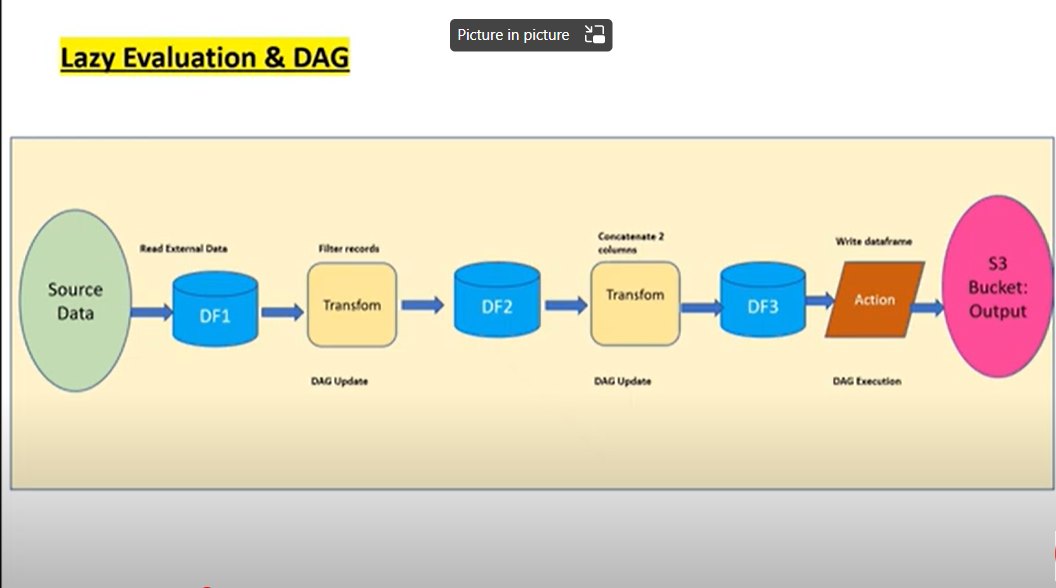

## Narrow vs Wide transformation

1.Narrow Transformation:

In narrow transformation the shuffling of data between the executors won't happen so it takes less time to execute and more performance. Example of narrow transformation is filter() method.

Why filter method is classified as narrow transformation?

Say for example i have different partitions in different executors basically, now i want to execute the filter() method. First the driver node shares the logical plan to the each executors.Since it's filter method each executor doesn't need to know what data is present in another executors look at below image

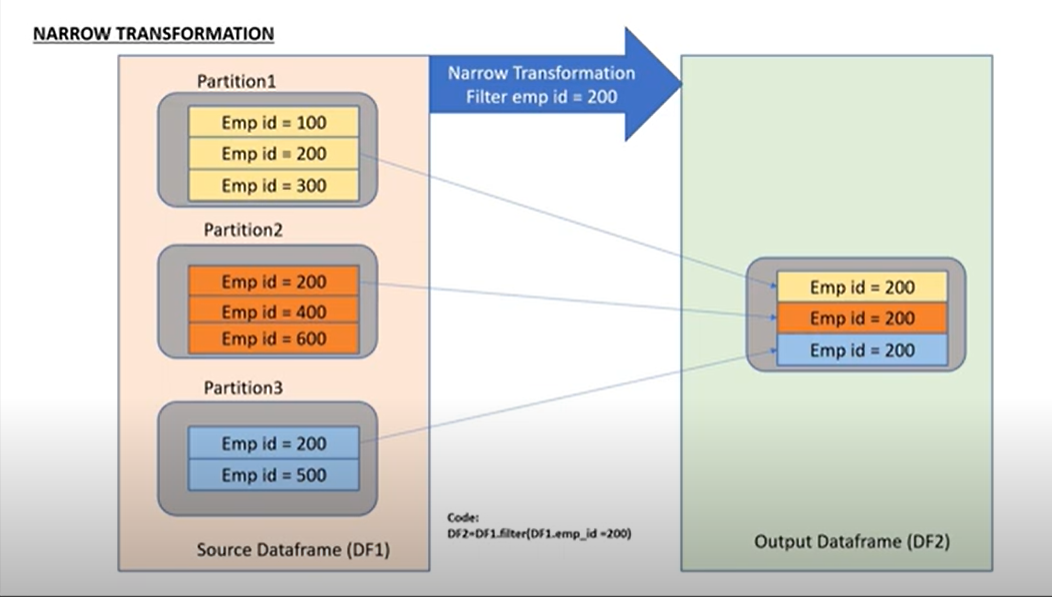

2.Wide Transformation:

In wide transformation the shuffling of data between the executors will happen so it takes more time to execute the given transformation. Example of wide transformation is groupby() method.

Why groupBy() method is classified as wide transformation?

Say for example i have different partitions in different executors basically, now i want to execute the groupBy() method. First the driver node shares the logical plan to the each executors. Since it's groupBy() method each executor needs to know what data is present in another executors so shuffling needs to happen

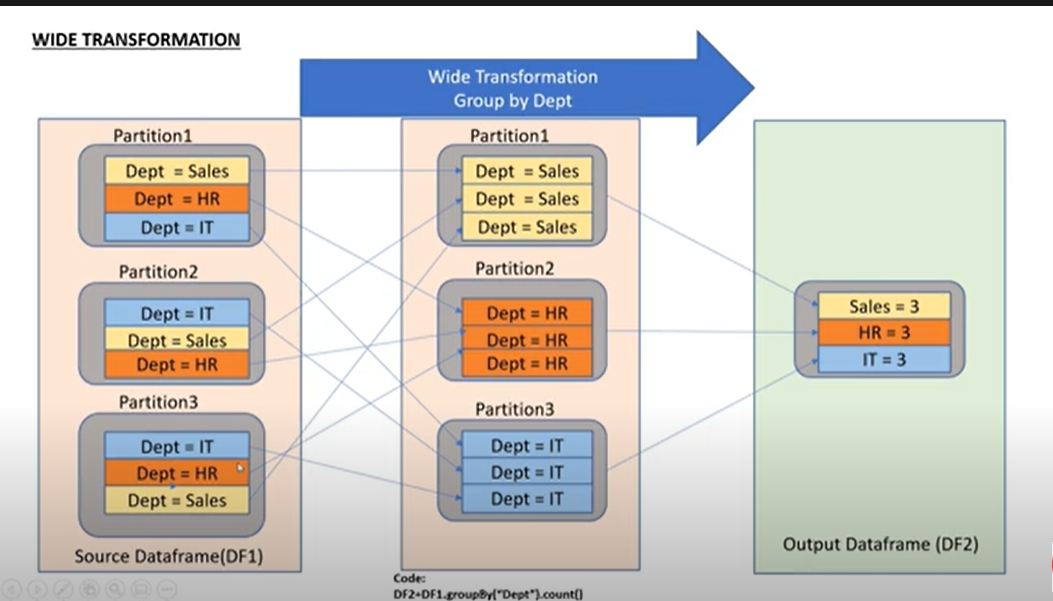

## Transformation and Action List

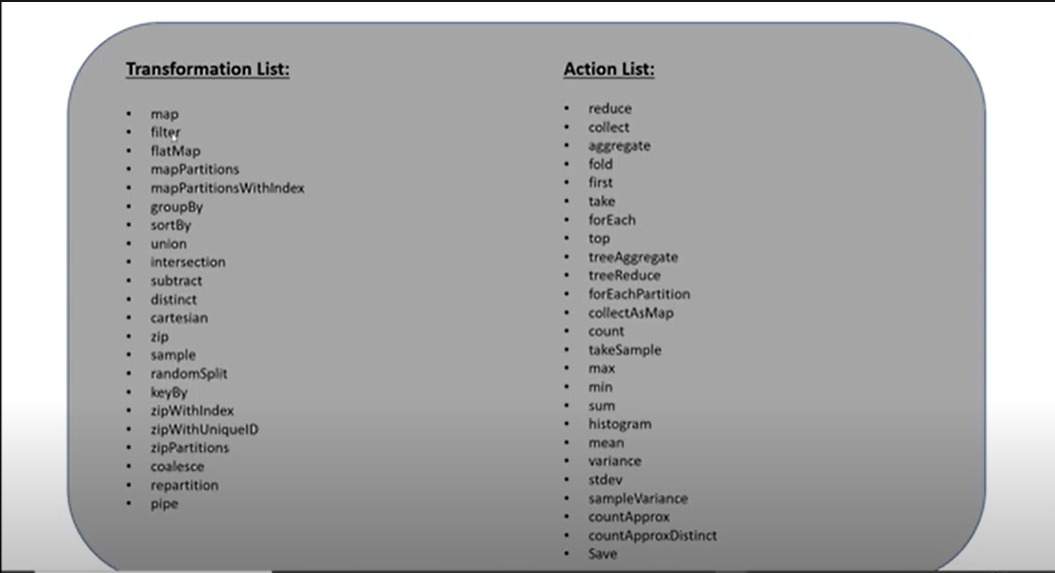

## Broadcasting

In [10]:
val transactions=List((100,"Cosmetic",150),(200,"Apparalel",250),(300,"Shirt",400),(400,"Trouser",500),(500,"Socks",20),
                      (100,"Belt",50),(200,"Cosmetic",250),(400,"Socks",20)).toDF("Store_Id","Item","Amount")

val storeNames=List((100,"Store_London"),(200,"Store_Paris"),(300,"Store_Frankfut"),(400,"Store_Stockholm"),(500,"Store_Oslo")).toDF(
"Store_Id","Store_Name")

transactions: org.apache.spark.sql.DataFrame = [Store_Id: int, Item: string ... 1 more field]
storeNames: org.apache.spark.sql.DataFrame = [Store_Id: int, Store_Name: string]


In [11]:
transactions.join(storeNames,transactions("Store_Id")===storeNames("Store_Id")).show()

+--------+---------+------+--------+---------------+
|Store_Id|     Item|Amount|Store_Id|     Store_Name|
+--------+---------+------+--------+---------------+
|     100| Cosmetic|   150|     100|   Store_London|
|     200|Apparalel|   250|     200|    Store_Paris|
|     300|    Shirt|   400|     300| Store_Frankfut|
|     400|  Trouser|   500|     400|Store_Stockholm|
|     500|    Socks|    20|     500|     Store_Oslo|
|     100|     Belt|    50|     100|   Store_London|
|     200| Cosmetic|   250|     200|    Store_Paris|
|     400|    Socks|    20|     400|Store_Stockholm|
+--------+---------+------+--------+---------------+



In [12]:
transactions.join(broadcast(storeNames),transactions("Store_Id")===storeNames("Store_Id")).show()

+--------+---------+------+--------+---------------+
|Store_Id|     Item|Amount|Store_Id|     Store_Name|
+--------+---------+------+--------+---------------+
|     100| Cosmetic|   150|     100|   Store_London|
|     200|Apparalel|   250|     200|    Store_Paris|
|     300|    Shirt|   400|     300| Store_Frankfut|
|     400|  Trouser|   500|     400|Store_Stockholm|
|     500|    Socks|    20|     500|     Store_Oslo|
|     100|     Belt|    50|     100|   Store_London|
|     200| Cosmetic|   250|     200|    Store_Paris|
|     400|    Socks|    20|     400|Store_Stockholm|
+--------+---------+------+--------+---------------+



## Example 2: BroadCasting

In [22]:
val states = Map(("NY","New York"),("CA","California"),("FL","Florida"))
val countries = Map(("USA","United States of America"),("IN","India"))
val broadcastStates = spark.sparkContext.broadcast(states)
val broadcastCountries = spark.sparkContext.broadcast(countries)
val df=List(("James","Smith","USA","CA"),("Michael","Rose","USA","NY"),("Robert","Williams","USA","CA"),("Maria","Jones","USA","FL")).toDF(
"firstname","lastname","country","state")
df.map(f=>{
    val country=f.getString(2)
    val state=f.getString(3)
    val fullCountry=broadcastCountries.value.get(country).get
    val fullState=broadcastStates.value.get(state).get
    (f.getString(0),f.getString(1),fullCountry,fullState)
}).toDF("firstname","lastname","fullcountry","fullstate").show()

+---------+--------+--------------------+----------+
|firstname|lastname|         fullcountry| fullstate|
+---------+--------+--------------------+----------+
|    James|   Smith|United States of ...|California|
|  Michael|    Rose|United States of ...|  New York|
|   Robert|Williams|United States of ...|California|
|    Maria|   Jones|United States of ...|   Florida|
+---------+--------+--------------------+----------+



states: scala.collection.immutable.Map[String,String] = Map(NY -> New York, CA -> California, FL -> Florida)
countries: scala.collection.immutable.Map[String,String] = Map(USA -> United States of America, IN -> India)
broadcastStates: org.apache.spark.broadcast.Broadcast[scala.collection.immutable.Map[String,String]] = Broadcast(38)
broadcastCountries: org.apache.spark.broadcast.Broadcast[scala.collection.immutable.Map[String,String]] = Broadcast(39)
df: org.apache.spark.sql.DataFrame = [firstname: string, lastname: string ... 2 more fields]


In [3]:
val states = Map(("NY","New York"),("CA","California"),("FL","Florida"))
val countries = Map(("USA","United States of America"),("IN","India"))
val broadcastStates = (states)
val broadcastCountries = (countries)
val df=List(("James","Smith","USA","CA"),("Michael","Rose","USA","NY"),("Robert","Williams","USA","CA"),("Maria","Jones","USA","FL")).toDF(
"firstname","lastname","country","state")
val df1=df.map(f=>{
    val country=f.getString(2)
    val state=f.getString(3)
    val fullCountry=broadcastCountries.get(country)
    val fullState=broadcastStates.get(state)
    (f.getString(0),f.getString(1),fullCountry,fullState)
}).toDF("firstname","lastname","fullcountry","fullstate")

states: scala.collection.immutable.Map[String,String] = Map(NY -> New York, CA -> California, FL -> Florida)
countries: scala.collection.immutable.Map[String,String] = Map(USA -> United States of America, IN -> India)
broadcastStates: scala.collection.immutable.Map[String,String] = Map(NY -> New York, CA -> California, FL -> Florida)
broadcastCountries: scala.collection.immutable.Map[String,String] = Map(USA -> United States of America, IN -> India)
df: org.apache.spark.sql.DataFrame = [firstname: string, lastname: string ... 2 more fields]
df1: org.apache.spark.sql.DataFrame = [firstname: string, lastname: string ... 2 more fields]


## Catalyst Optimizer

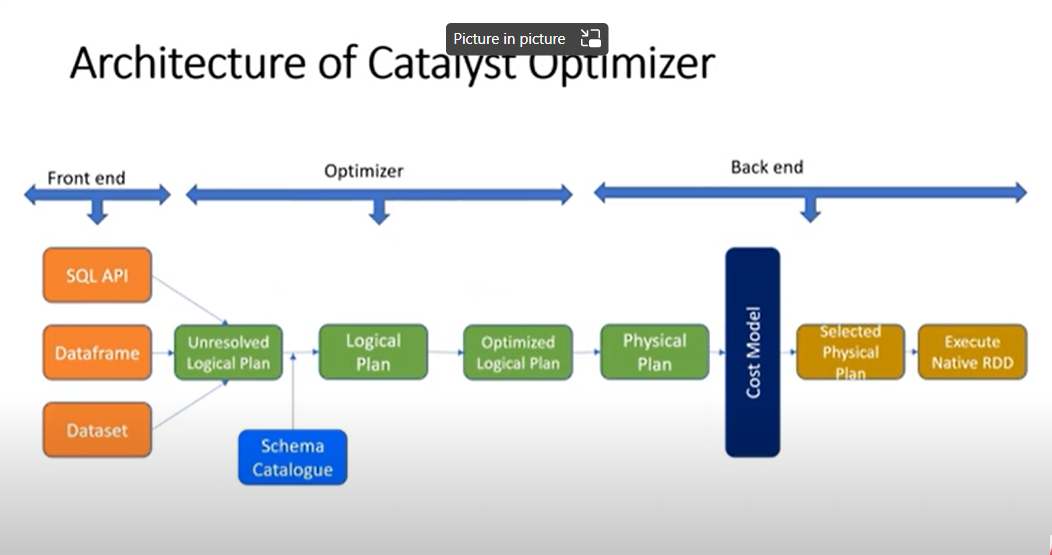

1.Unresolved Logical Plan-->checks for the syntax of a query

2.Logical Plan-->infers the datatypes for the columns of a dataframe or dataset

3.Optimized Logical Plan--->out of all other plans picks the best possible exection plan

4.Physical plan--> gives step by step instructions regarding how to execute the task

In [5]:
df1.explain() // to get the physical plan use the explain() function

== Physical Plan ==
*(1) Project [_1#71 AS firstname#80, _2#72 AS lastname#81, _3#73 AS fullcountry#82, _4#74 AS fullstate#83]
+- *(1) SerializeFromObject [staticinvoke(class org.apache.spark.unsafe.types.UTF8String, StringType, fromString, knownnotnull(assertnotnull(input[0, scala.Tuple4, true]))._1, true, false) AS _1#71, staticinvoke(class org.apache.spark.unsafe.types.UTF8String, StringType, fromString, knownnotnull(assertnotnull(input[0, scala.Tuple4, true]))._2, true, false) AS _2#72, staticinvoke(class org.apache.spark.unsafe.types.UTF8String, StringType, fromString, unwrapoption(ObjectType(class java.lang.String), knownnotnull(assertnotnull(input[0, scala.Tuple4, true]))._3), true, false) AS _3#73, staticinvoke(class org.apache.spark.unsafe.types.UTF8String, StringType, fromString, unwrapoption(ObjectType(class java.lang.String), knownnotnull(assertnotnull(input[0, scala.Tuple4, true]))._4), true, false) AS _4#74]
   +- *(1) MapElements $line8.$read$$iw$$iw$$iw$$iw$$iw$$iw$$iw$

In [1]:
def highSal(sal:Int):String={
    
    if(sal>56000){
        return "Low"
    }
    else{
        
        return "High"
    }
}

Intitializing Scala interpreter ...

Spark Web UI available at http://SonuAmrith:4041
SparkContext available as 'sc' (version = 3.0.3, master = local[*], app id = local-1652327477786)
SparkSession available as 'spark'


highSal: (sal: Int)String


In [ ]:
spark.udf.register("highSal",highSal(_:Int):String)

In [ ]:
(samp.selectExpr("highSal(salary) as Designation"))

In [10]:
object readingFile{
    
    def main (args:Array[String]){
        
        for(i<-args){
            
            println("value is = "+i)
        }
    }
}

defined object readingFile


In [11]:
val dupky=Array("Sonu","Amrith")
readingFile.main(dupky)

value is = Sonu
value is = Amrith


dupky: Array[String] = Array(Sonu, Amrith)
